In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [10]:
# Load the Iris dataset
iris = load_iris()
x_train = iris.data  # shape (150, 4)


In [12]:
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_shape=(100,), activation='relu'))
    model.add(Dense(4, activation='linear'))  # Output 4 features
    return model


In [13]:
def build_discriminator():
    model = Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [14]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # freeze discriminator when training GAN
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model


In [15]:
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile models
generator.compile(loss='mean_squared_error', optimizer=Adam(0.0002, 0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


In [16]:
epochs = 200
batch_size = 16

for epoch in range(epochs):
    # --- Train discriminator ---
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_samples = x_train[idx]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, 100)), verbose=0)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

    # --- Train generator ---
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

    # --- Print progress ---
    print(f"Epoch {epoch+1}/{epochs} | "
          f"Discriminator Loss: {0.5 * (d_loss_real[0] + d_loss_fake[0]):.4f} | "
          f"Generator Loss: {g_loss:.4f}")


Epoch 1/200 | Discriminator Loss: 0.4305 | Generator Loss: 0.6683
Epoch 2/200 | Discriminator Loss: 0.4899 | Generator Loss: 0.6749
Epoch 3/200 | Discriminator Loss: 0.5050 | Generator Loss: 0.6805
Epoch 4/200 | Discriminator Loss: 0.5094 | Generator Loss: 0.6867
Epoch 5/200 | Discriminator Loss: 0.5129 | Generator Loss: 0.6880
Epoch 6/200 | Discriminator Loss: 0.5147 | Generator Loss: 0.6912
Epoch 7/200 | Discriminator Loss: 0.5159 | Generator Loss: 0.6896
Epoch 8/200 | Discriminator Loss: 0.5175 | Generator Loss: 0.6894
Epoch 9/200 | Discriminator Loss: 0.5183 | Generator Loss: 0.6887
Epoch 10/200 | Discriminator Loss: 0.5201 | Generator Loss: 0.6871
Epoch 11/200 | Discriminator Loss: 0.5228 | Generator Loss: 0.6851
Epoch 12/200 | Discriminator Loss: 0.5241 | Generator Loss: 0.6835
Epoch 13/200 | Discriminator Loss: 0.5246 | Generator Loss: 0.6835
Epoch 14/200 | Discriminator Loss: 0.5257 | Generator Loss: 0.6822
Epoch 15/200 | Discriminator Loss: 0.5271 | Generator Loss: 0.6817
Epoc

In [17]:
# Generate 150 synthetic samples
synthetic_data = generator.predict(np.random.normal(0, 1, (150, 100)), verbose=0)
print("Synthetic data shape:", synthetic_data.shape)


Synthetic data shape: (150, 4)


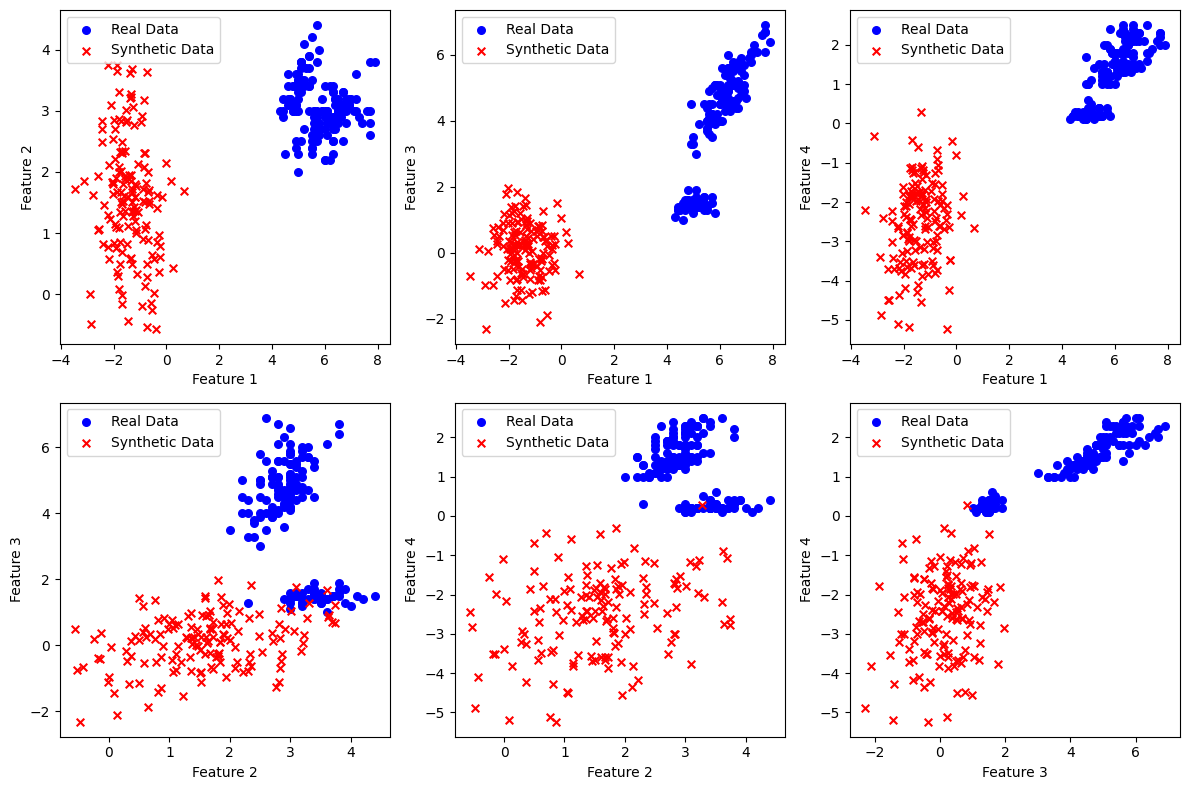

In [18]:
plt.figure(figsize=(12, 8))
plot_idx = 1

for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(2, 3, plot_idx)
        plt.scatter(x_train[:, i], x_train[:, j], label='Real Data', c='blue', marker='o', s=30)
        plt.scatter(synthetic_data[:, i], synthetic_data[:, j], label='Synthetic Data', c='red', marker='x', s=30)
        plt.xlabel(f'Feature {i + 1}')
        plt.ylabel(f'Feature {j + 1}')
        plt.legend()
        plot_idx += 1

plt.tight_layout()
plt.show()
